In [46]:
import pandas as pd
import geopandas as gpd
import sys
sys.path.append('../lib/')
import matplotlib.pyplot as plt
import math


import workers as workers
import sweden as sweden

In [2]:
result = pd.read_csv('../results/flows_1km_10km_sweden.csv')
grids = gpd.read_file("../results/grids_sweden/grids_1km_density_deso_with_10km_upper_grids.shp")

In [3]:
result.head()

,ozone,dzone,d_ij,D_ij_data,D_ij_sim,v_ij,grid_type
0,18,18,0.000000,0.000000,0.000000,0.000000,1
1,18,8,2.236068,1.639817,1.457747,43.436840,1
2,18,20,2.000000,1.648406,1.484936,54.296050,1
3,18,19,1.000000,1.960368,1.740077,217.184198,1
4,18,1,4.472136,1.534267,1.338410,10.859210,1


In [4]:
gdf_zones = gpd.read_file("../dbs/sweden/zones/DeSO/DeSO_2018_v2.shp")

In [5]:
grids.head()

,zone,deso,density,upper_deso,upper_dens,upper_zone,upper_xcoo,upper_ycoo,geometry
0,18,0114A0010,15.720316,0114A0010,15.720316,1,655000.0,6595000.0,"POLYGON ((660000.000 6596000.000, 660000.000 6..."
1,8,0114A0010,15.720316,0114A0010,15.720316,1,655000.0,6595000.0,"POLYGON ((659000.000 6598000.000, 659000.000 6..."
2,20,0114A0010,15.720316,0114A0010,15.720316,1,655000.0,6595000.0,"POLYGON ((660000.000 6598000.000, 660000.000 6..."
3,19,0114A0010,15.720316,0114A0010,15.720316,1,655000.0,6595000.0,"POLYGON ((660000.000 6597000.000, 660000.000 6..."
4,1,0114A0010,15.720316,0114A0010,15.720316,1,655000.0,6595000.0,"POLYGON ((658000.000 6600000.000, 658000.000 6..."


In [6]:
agg_level=4

In [7]:
grids_dict = dict(zip(grids.zone, grids.deso))

In [8]:
result.loc[:,'ozone_deso'] = result.loc[:, 'ozone'].map(grids_dict).apply(lambda x: x[:agg_level])

In [9]:
result.loc[:,'dzone_deso'] = result.loc[:, 'dzone'].map(grids_dict).apply(lambda x: x[:agg_level])

In [10]:
result

,ozone,dzone,d_ij,D_ij_data,D_ij_sim,v_ij,grid_type,ozone_deso,dzone_deso
0,18,18,0.000000,0.000000,0.000000,0.000000,1,0114,0114
1,18,8,2.236068,1.639817,1.457747,43.436840,1,0114,0114
2,18,20,2.000000,1.648406,1.484936,54.296050,1,0114,0114
3,18,19,1.000000,1.960368,1.740077,217.184198,1,0114,0114
4,18,1,4.472136,1.534267,1.338410,10.859210,1,0114,0114
...,...,...,...,...,...,...,...,...,...
72778292,5028,5024,14.142136,1.404068,1.234242,88.768872,10,0136,0136
72778293,5028,5025,10.000000,1.434981,1.263294,177.537744,10,0136,0136
72778294,5028,5026,14.142136,1.404068,1.234242,88.768872,10,0136,0136
72778295,5028,5027,10.000000,1.434981,1.263294,177.537744,10,0136,0136


In [11]:
result_1 = result.groupby(['ozone_deso', 'dzone_deso'])[ 'v_ij'].sum().reset_index()

In [12]:
result_1

,ozone_deso,dzone_deso,v_ij
0,0114,0114,1.328431e+08
1,0114,0115,2.557794e+07
2,0114,0117,4.094059e+06
3,0114,0120,1.368843e+07
4,0114,0123,4.911734e+05
...,...,...,...
2117,2583,2518,5.234224e+03
2118,2583,2583,9.534196e+05
2119,2584,2521,4.155623e+03
2120,2584,2523,6.283611e+03


In [13]:
result_2 = result.groupby(['ozone_deso', 'dzone_deso'])[ 'd_ij'].sum().reset_index()

In [14]:
result_3 = result.groupby(['ozone_deso', 'dzone_deso'])[ 'D_ij_data'].sum().reset_index()

In [15]:
result_4 = result.groupby(['ozone_deso', 'dzone_deso'])[ 'D_ij_sim'].sum().reset_index()

In [16]:
result_4

,ozone_deso,dzone_deso,D_ij_sim
0,0114,0114,2.402718e+04
1,0114,0115,6.314117e+04
2,0114,0117,1.103665e+05
3,0114,0120,3.020569e+05
4,0114,0123,1.729159e+04
...,...,...,...
2117,2583,2518,7.163742e+03
2118,2583,2583,1.714444e+05
2119,2584,2521,2.752290e+04
2120,2584,2523,3.866978e+04


In [17]:
grids_big = gpd.read_file("../dbs/sweden/zones/Deso/DeSO_2018_v2.shp")

In [18]:
grids_big.head()

,id,objectid,uuid,deso,befolkning,version,geometry
0,1.0,1,{D9661502-EE24-45AE-A1F7-C1C80F463556},0114A0010,790,2018_v2,"POLYGON ((661116.252 6606615.603, 661171.409 6..."
1,2.0,2,{5EA47309-A001-4E2A-843E-02EC8F544E4C},0114C1010,1608,2018_v2,"POLYGON ((666960.066 6598800.393, 666971.371 6..."
2,3.0,3,{0DA292ED-A306-4D7E-A392-BD063A3093E1},0114C1020,1610,2018_v2,"POLYGON ((667034.814 6600076.634, 667032.984 6..."
3,4.0,4,{18583EFC-ECC1-4D27-B520-DA294F5658FD},0114C1030,2365,2018_v2,"POLYGON ((667095.512 6599103.521, 667095.009 6..."
4,5.0,5,{6574A7B3-AD12-4A81-8EAC-773B976B72BC},0114C1040,2346,2018_v2,"POLYGON ((664610.264 6600922.821, 664638.910 6..."


In [19]:
grids_big.loc[:,'upper_deso'] = grids_big.loc[:, 'deso'].apply(lambda x: x[0:4])

In [20]:
grids_big_use = grids_big.dissolve(by='upper_deso', aggfunc='sum')

In [21]:
grids_big_use

,geometry,id,objectid,befolkning
upper_deso,,,,
0114,"POLYGON ((664663.631 6597477.443, 664653.118 6...",276.0,276,46786
0115,"POLYGON ((675775.690 6600118.275, 675631.701 6...",627.0,627,34090
0117,"POLYGON ((686822.565 6592520.451, 686041.700 6...",1242.0,1242,45574
0120,"POLYGON ((697939.414 6569646.878, 697846.459 6...",1860.0,1860,45000
0123,"POLYGON ((659903.355 6587815.099, 659877.356 6...",4380.0,4380,79990
...,...,...,...,...
2580,"POLYGON ((800857.314 7287900.809, 799591.866 7...",271147.0,271147,78105
2581,"POLYGON ((793300.542 7241240.406, 793295.100 7...",166082.0,166082,42281
2582,"POLYGON ((811093.111 7304243.942, 811106.486 7...",107181.0,107181,28080


In [22]:
upper_deso_name = list(grids_big_use.index.array)

In [23]:
dis = dict()
for i in upper_deso_name:
    element = dict()
    for j in upper_deso_name:
        delta_x = grids_big_use.geometry.loc[i].centroid.x -  grids_big_use.geometry.loc[j].centroid.x
        delta_y = grids_big_use.geometry.loc[i].centroid.y -  grids_big_use.geometry.loc[j].centroid.y
        distance = delta_x * delta_x + delta_y * delta_y
        element[j] = pow(distance, 0.5)
    dis[i] = element

In [24]:
result_1.loc[:,'distance'] = 0
result_2.loc[:,'distance'] = 0
result_3.loc[:,'distance'] = 0
result_4.loc[:,'distance'] = 0

In [25]:
result_1.head()

,ozone_deso,dzone_deso,v_ij,distance
0,0114,0114,1.328431e+08,0
1,0114,0115,2.557794e+07,0
2,0114,0117,4.094059e+06,0
3,0114,0120,1.368843e+07,0
4,0114,0123,4.911734e+05,0


In [26]:
for i in result_1.index:
    result_1.loc[i, 'distance'] = dis[result_1.loc[i, 'ozone_deso']][result_1.loc[i, 'dzone_deso']]
for i in result_2.index:
    result_2.loc[i, 'distance'] = dis[result_2.loc[i, 'ozone_deso']][result_2.loc[i, 'dzone_deso']]
for i in result_3.index:
    result_3.loc[i, 'distance'] = dis[result_3.loc[i, 'ozone_deso']][result_3.loc[i, 'dzone_deso']]
for i in result_4.index:
    result_4.loc[i, 'distance'] = dis[result_4.loc[i, 'ozone_deso']][result_4.loc[i, 'dzone_deso']]

In [27]:
result_1

,ozone_deso,dzone_deso,v_ij,distance
0,0114,0114,1.328431e+08,0.000000
1,0114,0115,2.557794e+07,18159.440980
2,0114,0117,4.094059e+06,36988.166911
3,0114,0120,1.368843e+07,56218.609477
4,0114,0123,4.911734e+05,10968.190328
...,...,...,...,...
2117,2583,2518,5.234224e+03,77605.749310
2118,2583,2583,9.534196e+05,0.000000
2119,2584,2521,4.155623e+03,132290.030752
2120,2584,2523,6.283611e+03,100904.279948


In [71]:
distance_threshold  = []
for i in range(1, 11):
    distance_threshold.append((result_1.distance.min() + result_1.distance.max())* i * 0.1)

In [72]:
distance_threshold

[15589.98810224734,
 31179.97620449468,
 46769.96430674202,
 62359.95240898936,
 77949.9405112367,
 93539.92861348404,
 109129.91671573138,
 124719.90481797872,
 140309.89292022606,
 155899.8810224734]

In [30]:
result_1.loc[:,'level'] = 0
result_2.loc[:,'level'] = 0
result_3.loc[:,'level'] = 0
result_4.loc[:,'level'] = 0

In [79]:
def get_level(dp, d):
    level_result = 1
    for ddpp in dp:
        if d > ddpp:
            level_result = level_result + 1
        else:
            break
    return level_result

In [82]:
l = get_level(distance_threshold, result_1.distance.min())

In [83]:
print(l)

1


In [32]:
for i in result_1.index:
    result_1.loc[i, 'level'] = get_level(  distance_threshold, result_1.loc[i, 'distance'])
for i in result_2.index:
    result_2.loc[i, 'level'] = get_level(  distance_threshold, result_2.loc[i, 'distance'])
for i in result_3.index:
    result_3.loc[i, 'level'] = get_level(  distance_threshold, result_3.loc[i, 'distance'])
for i in result_4.index:
    result_4.loc[i, 'level'] = get_level(  distance_threshold, result_4.loc[i, 'distance'])

In [33]:
result_1

,ozone_deso,dzone_deso,v_ij,distance,level
0,0114,0114,1.328431e+08,0.000000,1
1,0114,0115,2.557794e+07,18159.440980,3
2,0114,0117,4.094059e+06,36988.166911,7
3,0114,0120,1.368843e+07,56218.609477,9
4,0114,0123,4.911734e+05,10968.190328,1
...,...,...,...,...,...
2117,2583,2518,5.234224e+03,77605.749310,9
2118,2583,2583,9.534196e+05,0.000000,1
2119,2584,2521,4.155623e+03,132290.030752,10
2120,2584,2523,6.283611e+03,100904.279948,10


In [36]:
# Initialise an object for storing the ground-truth data including zones
data_sweden = sweden.GroundTruthLoader()
# Load zones
data_sweden.load_zones()
# Load ground-truth survey data into ODM form
data_sweden.load_odm()

In [37]:
data_sweden.odm.head()

,ozone,dzone,v_ij_gt,D_ij_gt
0,0114A0010,0114C1170,182551.736842,9.0
1,0114A0010,0163C1140,810292.236111,15.0
2,0114A0010,0163C1170,182927.555556,10.0
3,0114A0010,0163C1350,94404.100629,9.0
4,0114A0010,0163C1380,23397.135431,20.0


In [42]:
data_sweden.odm.loc[:, 'ozone_deso'] = data_sweden.odm.loc[:, 'ozone'].apply(lambda x: x[:agg_level])
data_sweden.odm.loc[:, 'dzone_deso'] = data_sweden.odm.loc[:, 'dzone'].apply(lambda x: x[:agg_level])
flows_gt = data_sweden.odm.groupby(['ozone_deso', 'dzone_deso'])['v_ij_gt'].sum().reset_index()
flows_gt.head()

,ozone_deso,dzone_deso,v_ij_gt
0,0114,0114,5.144816e+07
1,0114,0115,2.166490e+05
2,0114,0117,5.804400e+05
3,0114,0123,5.046360e+05
4,0114,0125,2.617775e+04


In [43]:
flows_comparison = flows_gt.loc[flows_gt['v_ij_gt'] != 0, :].merge(result_1, on=['ozone_deso', 'dzone_deso'], how='inner')
flows_comparison.loc[:, 'v_ij_gt'] = flows_comparison.loc[:, 'v_ij_gt'] / flows_comparison.loc[:, 'v_ij_gt'].sum()
flows_comparison.loc[:, 'v_ij'] = flows_comparison.loc[:, 'v_ij'] / flows_comparison.loc[:, 'v_ij'].sum()
flows_comparison.head()

,ozone_deso,dzone_deso,v_ij_gt,v_ij,distance,level
0,0114,0114,0.002559,0.061782,0.000000,1
1,0114,0115,0.000011,0.011896,18159.440980,3
2,0114,0117,0.000029,0.001904,36988.166911,7
3,0114,0123,0.000025,0.000228,10968.190328,1
4,0114,0125,0.000001,0.000429,23796.622868,5


In [69]:
level_percent = 10
flows_comparison_level = flows_comparison[flows_comparison['level'] == level_percent]

In [57]:
flows_comparison_level

,ozone_deso,dzone_deso,v_ij_gt,v_ij,distance,level
20,0115,0187,0.000081,0.000001,21569.075309,4
65,0125,0180,0.000647,0.001648,20105.752096,4
67,0125,0184,0.000078,0.000036,20531.655449,4
87,0127,0180,0.000521,0.000035,20796.084968,4
101,0136,0138,0.000239,0.000087,21587.466882,4
...,...,...,...,...,...,...
1237,2082,2081,0.000132,0.000015,20281.269212,4
1239,2082,2083,0.000113,0.000041,20318.658974,4
1241,2083,2082,0.000113,0.000041,20318.658974,4
1292,2262,2280,0.000029,0.000009,21607.454488,4


(1e-07, 0.1)

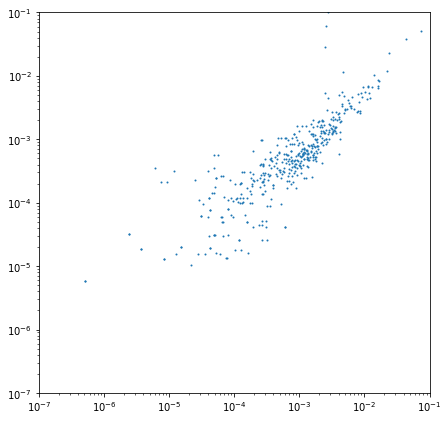

In [48]:
plt.figure(figsize=(7, 7))
plt.scatter(flows_comparison_level.loc[:, 'v_ij_gt'], flows_comparison_level.loc[:, 'v_ij'], s=1)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.0000001, 0.1)
plt.ylim(0.0000001, 0.1)

In [70]:
flows_comparison_level.loc[:, 'v_ij_min'] = flows_comparison_level.apply(lambda row: min(row['v_ij_gt'], row['v_ij']), axis=1)
SSI = 2 * flows_comparison_level.loc[:, 'v_ij_min'].sum() / \
      (flows_comparison_level.loc[:, 'v_ij_gt'].sum() + flows_comparison_level.loc[:, 'v_ij'].sum())
SSI

C:\Users\laptop\AppData\Local\Temp\ipykernel_1460\1389571067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flows_comparison_level.loc[:, 'v_ij_min'] = flows_comparison_level.apply(lambda row: min(row['v_ij_gt'], row['v_ij']), axis=1)


0.09828957677530342

In [54]:
result_2

,ozone_deso,dzone_deso,d_ij,distance,level
0,0114,0114,8.830191e+05,0.000000,1
1,0114,0115,8.212582e+06,18159.440980,3
2,0114,0117,2.707418e+07,36988.166911,7
3,0114,0120,7.084904e+07,56218.609477,9
4,0114,0123,5.966550e+06,10968.190328,1
...,...,...,...,...,...
2117,2583,2518,3.494820e+04,77605.749310,9
2118,2583,2583,6.245237e+05,0.000000,1
2119,2584,2521,1.487518e+05,132290.030752,10
2120,2584,2523,1.877940e+05,100904.279948,10


In [55]:
result_3

,ozone_deso,dzone_deso,D_ij_data,distance,level
0,0114,0114,2.619493e+04,0.000000,1
1,0114,0115,6.432122e+04,18159.440980,3
2,0114,0117,9.571095e+04,36988.166911,7
3,0114,0120,2.640998e+05,56218.609477,9
4,0114,0123,1.547686e+04,10968.190328,1
...,...,...,...,...,...
2117,2583,2518,8.181201e+03,77605.749310,9
2118,2583,2583,1.955127e+05,0.000000,1
2119,2584,2521,3.140845e+04,132290.030752,10
2120,2584,2523,4.415078e+04,100904.279948,10


In [57]:
result_4

,ozone_deso,dzone_deso,D_ij_sim,distance,level
0,0114,0114,2.402718e+04,0.000000,1
1,0114,0115,6.314117e+04,18159.440980,3
2,0114,0117,1.103665e+05,36988.166911,7
3,0114,0120,3.020569e+05,56218.609477,9
4,0114,0123,1.729159e+04,10968.190328,1
...,...,...,...,...,...
2117,2583,2518,7.163742e+03,77605.749310,9
2118,2583,2583,1.714444e+05,0.000000,1
2119,2584,2521,2.752290e+04,132290.030752,10
2120,2584,2523,3.866978e+04,100904.279948,10
